In [1]:
import time 
start_time = time.time()


## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:

# Detecting Fake News using 

# Obtaining our data 
---
[News Headlines dataset for Sarcasm Detection](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection) is collected from two news website. TheOnion (sarcastic) and HuffPost (real). Each record consist of three attributes: 1) `is_sarcastic`, 1 if the record is sarcastic 0 if not. 2) `headline`, the headline of the news article 3) `article_link`, link to original article. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)

In [4]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
article_link    26709 non-null object
headline        26709 non-null object
is_sarcastic    26709 non-null int64
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


# Exploratory Data Analysis
---
Importing necessary libraries for visualization.

In [ ]:
import plotly.plotly as py 
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

Percentage breakdown of sarcastic news vs. real news.

In [7]:
df_sar = df.is_sarcastic.value_counts()
labels = ['Real News', 'Sarcastic News']
sizes = np.array((df_sar/ df_sar.sum()) *100)
colors = ['#58D68D', '#9B59B6']

graph = go.Pie(labels=labels, values=sizes, hoverinfo='label + percent',
              marker=dict(colors=colors, line=dict(color='#FFFFFF', width=2)))
layout = go.Layout(title='Sarcastics News vs. Real News')
data = [graph]

fig= go.Figure(data=data, layout=layout)
iplot(fig, filename='Sarcastic_Real')


Below is a graph of the most frequent words in headlines.


In [8]:
all_words = df['headline'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Viridis',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Most Frequent Words (unclean) in Headlines'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='basic-bar')

From the above graph, we can see that the headlines needs to be cleaned, as the top most occurring words are considered to be "stop words", in NLP, stop words are considered useless. 

## Tokenization 
---
Tokenization is used to convert text into vectors.

In [9]:
import nltk 
import itertools 

In [10]:
sar_df = df[df.is_sarcastic ==1]
real_df = df[df.is_sarcastic ==0]


In [11]:
sar_df.reset_index(drop=True, inplace=True)
real_df.reset_index(drop=True, inplace=True)
real_df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
3,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
4,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0


In [12]:
#tokenizing headlines for sarcasm
sar_news = [] 
for i in range(0, sar_df.shape[0]): 
    head_txt = sar_df.headline[i]
    head_txt = head_txt.split(' ')
    sar_news.append(head_txt)

    
real_news = []
for i in range(0, real_df.shape[0]):
    head_txt = real_df.headline[i]
    head_txt = head_txt.split(' ')
    real_news.append(head_txt)
    
#converting into single list
sar_list = list(itertools.chain(*sar_news))
real_list = list(itertools.chain(*real_news))

In [13]:
sarcastic = sar_df.apply(lambda row: nltk.word_tokenize(row['headline']), axis=1)

In [14]:
np.shape(sarcastic)

(11724,)

In [15]:
#intializing stopwords from nltk corpus 
stopwords = nltk.corpus.stopwords.words('english')

#creating a new list without stopwords 
sar_list_stp = [word for word in sar_list if word.lower() not in stopwords]
real_list_stp = [word for word in real_list if word.lower() not in stopwords]

Top 10 most occurring words in both sarcastic and real news headlines

In [16]:
from collections import Counter 

#creating a dictionary with word as key and word count as value
sar_cnt = Counter(sar_list_stp)
real_cnt = Counter(real_list_stp)



In [17]:
#dictionary to DataFrame
sar_cnt = pd.DataFrame(list(sar_cnt.items()), columns= ['Words', 'Count'])
sar_cnt.sort_values(by=['Count'], ascending= False, inplace=True)
real_cnt = pd.DataFrame(list(real_cnt.items()), columns= ['Words', 'Count'])
real_cnt.sort_values(by=['Count'], ascending= False, inplace=True)

#top 10 
sar_top10 = sar_cnt.head(10)
real_top10 = real_cnt.head(10)
        

In [18]:
from plotly import tools 

sar_tr  = go.Bar(
    x=sar_top10['Count'],
    y=sar_top10['Words'],
    name='Sarcastic News',
    marker=dict(
        color='rgba(155, 89, 182, 0.6)',
        line=dict(
            color='rgba(155, 89, 182, 1.0)',
            width=.3,
        )
    ),
    orientation='h',
    opacity=0.6
)

acc_tr  = go.Bar(
    x=real_top10['Count'],
    y=real_top10['Words'],
    name='Real News',
    marker=dict(
        color='rgba(88, 214, 141, 0.6)',
        line=dict(
            color='rgba(88, 214, 141, 1.0)',
            width=.3,
        )
    ),
    orientation='h',
    opacity=0.6
)

fig = tools.make_subplots(rows=2, cols=1, subplot_titles=('Top 10 Most occuring words in Sarcastic News Headlines',
                                                          'Top 10 Most occuring words in Real News Headlines'))

fig.append_trace(sar_tr, 1, 1)
fig.append_trace(acc_tr, 2, 1)


fig['layout'].update(height=1200, width=800)

iplot(fig, filename='sar_vs_real')
                       
                                            

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



/anaconda3/envs/learn-env/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:318: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.




In [19]:
all_cnt = pd.merge(real_cnt, sar_cnt, on='Words')
all_cnt['Count'] = all_cnt.Count_x + all_cnt.Count_y 
# all_cnt = all_cnt.drop(['Count_x', 'Count_y'], axis=1, inplace=True)

In [20]:
all_cnt.head(10)

,Words,Count_x,Count_y,Count
0,trump,957,200,1157
1,new,664,821,1485
2,donald,453,15,468
3,trump's,364,24,388
4,says,346,104,450
5,women,240,70,310
6,one,234,253,487
7,u.s.,223,187,410
8,first,220,169,389
9,make,209,111,320


In [21]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


## Stemming 
---
Stemming is the process of reducing a word to its "base" word. NLTK provides several ways to stem. Today we will use the Snowball stemming algorithm. The Snowball is a small string processing language designed for creating stemming algorithms for use in information retrieval. 

Below we'll see an example of stemming using SnowballStemer. 

In [22]:
stemmer = nltk.stem.SnowballStemmer("english", ignore_stopwords=True)

print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))
print('\n')
print("The stemmed form of learning is: {}".format(stemmer.stem("learning")))
print("The stemmed form of learns is: {}".format(stemmer.stem("learns")))
print("The stemmed form of learn is: {}".format(stemmer.stem("learn")))
print('\n')
print("The stemmed form of leaves is: {}".format(stemmer.stem("leaves")))


The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


The stemmed form of learning is: learn
The stemmed form of learns is: learn
The stemmed form of learn is: learn


The stemmed form of leaves is: leav


In the above example, the word leaves becomes 'leav' after stemming it. Sometimes stemming the words can result in meaningless words like 'leav'. To combat that, we have lemmatization. 


## Lemmatization 
---
Lemmatization is the process of grouping the inflected forms of a word so it can be analysed as a single item, identified by the word's lemma, or dictionary form. Lemmatization aims to reduce words based on actual vocabulary words (the Lemma) and will not chop off words into stemmed forms that do not carry any lexical meaning. 

In [23]:
from nltk.stem import WordNetLemmatizer
# nltk.download()
lemm = WordNetLemmatizer()
print("The lemmatized form of leaves is: {}".format(lemm.lemmatize("leaves")))

The lemmatized form of leaves is: leaf


In [24]:
#Sarcasm headline after Lemmatization
sar_wost_lem = []
for batch in sar_news:
    sar_list_restp = [word for word in batch if word.lower() not in stopwords]
    lemm = WordNetLemmatizer()
    sar_list_lemm =  [lemm.lemmatize(word) for word in sar_list_restp]
    sar_wost_lem.append(sar_list_lemm)

#Real headline after Lemmatization
real_wost_lem = []
for batch in real_news:
    acc_list_restp = [word for word in batch if word.lower() not in stopwords]
    lemm = WordNetLemmatizer()
    acc_list_lemm =  [lemm.lemmatize(word) for word in acc_list_restp]
    real_wost_lem.append(acc_list_lemm)

In [25]:
sar_dict = list(itertools.chain.from_iterable(sar_wost_lem))
real_dict = list(itertools.chain.from_iterable(real_wost_lem))

sar_lem_cnt = Counter(sar_dict)
real_lem_cnt = Counter(real_dict)

#dictionary to DataFrame
sar_lem_cnt = pd.DataFrame(list(sar_lem_cnt.items()), columns= ['Lemma Words', 'Count'])
sar_lem_cnt.sort_values(by=['Count'], ascending= False, inplace=True)
real_lem_cnt = pd.DataFrame(list(real_lem_cnt.items()), columns= ['Lemma Words', 'Count'])
real_lem_cnt.sort_values(by=['Count'], ascending= False, inplace=True)

#top 10 
sar_lem_top20 = sar_lem_cnt.head(20)
real_lem_top20 = real_lem_cnt.head(20)

In [26]:
#merging DataFrames
df_lemma = pd.merge(sar_lem_cnt, real_lem_cnt, on='Lemma Words')
df_lemma['Count'] = df_lemma.Count_x + df_lemma.Count_y 
df_lemma.sort_values(by=['Count'], ascending=False, inplace=True)
df_lemma.head(10)

,Lemma Words,Count_x,Count_y,Count
1,new,821,664,1485
0,man,1022,208,1230
14,trump,200,959,1159
3,woman,360,370,730
22,say,162,490,652
5,get,283,290,573
6,one,267,237,504
15,make,194,300,494
2,area,478,12,490
1048,donald,15,453,468


In [27]:
lemma_data = [go.Bar(
            x = np.array(df_lemma['Lemma Words'][0:30]),
            y = np.array(df_lemma.Count[0:30]),
            marker= dict(colorscale='Viridis' ,color =df_lemma.Count[0:100]),
            text='Word counts')]

layout = go.Layout(
    title='Top Lemma words in Headlines'
)

fig = go.Figure(data=lemma_data, layout=layout)

iplot(fig, filename='lemma-basic-bar')

## Bag of Words 
---
The bag-of-words model is used in classification where the number of words (frequency) is used as a feature for training a classifier. In short a bag-of-words model is a way of extracting features from text for use in modeling. 

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vec = []
for block in sar_wost_lem:
    vectorizer = CountVectorizer(min_df=0)
    sentence_transform = vectorizer.fit_transform(block)
    vec.append(sentence_transform)
    

print("The features are:\n {}".format(vectorizer.get_feature_names()))
print("\nThe vectorized array looks like:\n {}".format(sentence_transform.toarray()))

The features are:
 ['christmas', 'francis', 'got', 'pope', 'sweater', 'vestment', 'wearing']

The vectorized array looks like:
 [[0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]]


## WordCloud
---

In [29]:

#import necessary libraries
from wordcloud import WordCloud
from collections import Counter

import re
import string

from nltk.corpus import stopwords
stop = stopwords.words('english')

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
text = df.headline.tolist()

In [32]:
text_cloud = " ".join(str(x) for x in text)

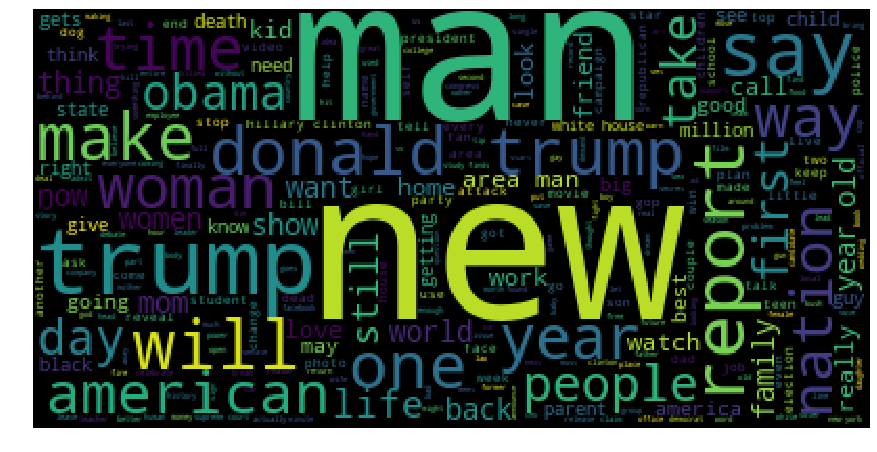

In [33]:
wordcloud = WordCloud(max_font_size=100, max_words=1000).generate(text_cloud
                                                                 )
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Modeling with Keras 
---

In [34]:
#importing Keras library 
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam

Using TensorFlow backend.


## Data preparation 
---
We need to prepare our data prior to feeding into our model. Since this dataset was clean to begin with, we will proceed by using sklearn's LabelEncoder, which converts each class into a numerical value. 

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = df.headline
y = df.is_sarcastic
y = le.fit_transform(y)
Y = y.reshape(-1,1)

## Training and Test data 
---

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                        test_size=.25, random_state=10)

## Preprocessing data 
---
There are a few ways we can preprocess our text data. We can use bag-of-words or word embeddings. 

**Bag-of-words**: is a representation of text that describes the occurrence of words within a document that involves a vocabulary of known words, and a measure of the presence of known words. In short, a bag-of-words model is a way of extracting features from text for use in modeling. [source](https://machinelearningmastery.com/gentle-introduction-bag-words-model/)

This model is great for prediction problems in language modeling and documentation classification. But like everything there are limitations to bag-of-words such as: 1) vocabulary, requires careful design 2) sparsity, sparse representations are harder to model for computational reasons and for information reasons 3) meaning, discarding the word order ignores the context, and in turn the semantics gets lost. Think of **one-hot vector**, where there is one dimension for every word. This will create a LOT of dimensionality which can hurt our model's performance(recall the **Curse of Dimensionality**). 

We will use Word Embeddings instead. 

**Word Embeddings**: are a type of vectorization strategy that computes word vectors from a text corpus by training a neural network, which results in a high-dimensional embedding space, where each word is in the corpus is a unique vector in that space. In this embedding space, the position of the vector relative to the other vectors captures semantic meaning. [source](https://learn.co/tracks/data-science-career-v1-1/module-4-advanced-machine-learning-deep-learning/section-45-deep-nlp-word-embeddings/word-embeddings)

**Benefits:**
- captures semantic relationships 
- size of the vector is a tunable parameter
- pre-trained embedding layer i.e. GloVE or train your own using a neural network
- can be learned from text data and reused 
- an improvement over the sparse representation used in bag-of-words models 


![neural_network](image1.png)

**Below we will:**
- Tokenize the data to convert text to ordered set i.e. lists
- Add padding to ensure our lists has the same shape 
- maxlen = 200, this is arbitrary number, as there are many ways to determine the maximum 


In [40]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing import sequence
maxwords = 1000 
maxlen = 200

token = Tokenizer(num_words=maxwords)
token.fit_on_texts(X_train)

sequences = token.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(sequences, maxlen=maxlen)

## What is a Neural Network? 
---
A [neural network](https://www.xenonstack.com/blog/artificial-neural-network-applications/) is a group of algorithms that certify the underlying relationship in a set of data similar to the human brain. The neural network helps to change the input so that the network gives the best result without redesigning the output procedure. 

## What's the difference between human brain and computer brain? 
<img src='How-Is-Brain-Different-From-Computers.png'>

## Creating a Basic Neural Network
---
Neural networks are composed of several layers: 
- **Input layer**, takes the input values (features) and passes the information on to the next layer. We define this layer with a max words property, which will only accept a list a words with the set dimension `maxwords= 1000`.
- We then pass our vectors to an **embedding layer**, where we project the words onto a defined vector space, which allows us to reduce model size and reduce dimesionality.
- **Dense layers** or **"Hidden layers"**, are a linear operation where every input is connected to every output by a weight, and generally followed by a non-linear **activation function**, in our case we'll use `relu`.
- To manage overfitting, **Regularization layers** are used. In this layer, we penalise our loss term by adding a L1 (LASSO) or L2 (Ridge),  on the weight vector. Alternatively, we can apply a **dropout layer**, where individual nodes are dropped out of the network to reduce the size of the network.
- Last but not least, the **output layer**. This is last layer in the network and receives its inputs from the last hidden layer. In this layer, we define the number of desired outcome values. In our case only 1 neuron in the output layer. A final **activation function** is used to assign the output neurons the desired values. Generally, we use the sigmoid function because of it's inherent binary results, which is highly beneficial to a classification task. 

## Defining RNN - Recurrent Neural Network
---


**RNNs** are a class of neural networks that allow previous outputs to be used as inputs while having hidden layers. RNNs are used to evaluate ___**Sequences**___ of data, vs. individual data points, where order and time series are important. 

Time series and text data is a great example of sequence data. Time series (stock price), where historical price matters. Text data, where words need to be in proper order for a letter or document to make sense. RNNs excel at NLP tasks because they can take in text as full sequences of words, from a single sentence, up to an entire corpus or book. Because of their ability to sequencing data, they do not lose information that comes from a traditional bag-of-words vectorization approach. 

<img src='unrolled-Copy1.gif'>

# Model 1
___


Below, we are defining our RNN model, which includes:
- **Input layer**
- Word **Embedding layer**
- **LSTM**: To deal with vanishsing and exploding gradient, we use specialized neurons called LSTM for our RNNs that are able to effectively learn what to remember and what to forget in sequence models. 
- **Dense layers** with **activation function** = `relu`
- **Dropout layer**
- **Output layer** with **activation funtion** = `sigmoid`

In [41]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Model

def RNN():
    
    inputs = Input(name='inputs',shape=[maxlen])
    
    #layers 
    layer = Embedding(maxwords,50,input_length=maxlen)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    
    #output layer
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

## Compiling the model 
---
Here, we compile our network by passing a loss function, optimizer, and metrics parameter. 
- `loss='binary_crossentropy'` : our **loss function** computes the error for a single training example. The cost function is the average of the loss functions of the entire training set. We are using `'binary_crossentropy'` because we have two target classes. If you have more than two target classes, use `'categorical_crossentropy'` as your loss function. 
- The **optimizer** is a search technique used to update weight values in the model. We are using `optimizer=Adam(0.01)` , Adapative Moment Estimation or **Adam** which uses adaptive learning rates. **Learning rate** determines how fast or slow we want to update our weight values. It should be high enough to take an acceptable time to converge, and low enough to find the global minima. 
- Performance `metrics` are used to measure performance. We are using `metric=['accuracy']`

In [42]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=Adam(0.01), metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

## Fitting the Model
---
Here, we train the neural network using our parameters: 
- We plug in our `X_train` and `y_train` 
- `batch_size=` , which is the number of training examples in one forward and backward pass.
- `epochs=` , which is the number of times the model is exposed to the training dataset. 

In [43]:
model_1_hist = model.fit(X_train, y_train, batch_size=100, epochs=7,
         validation_split= 0.1)

Train on 18027 samples, validate on 2004 samples
Epoch 1/7
18027/18027 [==============================] - 37s 2ms/step - loss: 0.4853 - acc: 0.7650 - val_loss: 0.4278 - val_acc: 0.8019
Epoch 2/7
18027/18027 [==============================] - 35s 2ms/step - loss: 0.3738 - acc: 0.8321 - val_loss: 0.4076 - val_acc: 0.8164
Epoch 3/7
18027/18027 [==============================] - 34s 2ms/step - loss: 0.3416 - acc: 0.8494 - val_loss: 0.4041 - val_acc: 0.8104
Epoch 4/7
18027/18027 [==============================] - 35s 2ms/step - loss: 0.3116 - acc: 0.8590 - val_loss: 0.4136 - val_acc: 0.8144
Epoch 5/7
18027/18027 [==============================] - 35s 2ms/step - loss: 0.2890 - acc: 0.8703 - val_loss: 0.4240 - val_acc: 0.8214
Epoch 6/7
18027/18027 [==============================] - 35s 2ms/step - loss: 0.2593 - acc: 0.8795 - val_loss: 0.4624 - val_acc: 0.8134
Epoch 7/7
18027/18027 [==============================] - 34s 2ms/step - loss: 0.2344 - acc: 0.8935 - val_loss: 0.5514 - val_acc: 0.8064

## Testing the model
---

In [44]:
X_test = token.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

## Model accuracy 
---

In [45]:
acc_1 = model.evaluate(X_test, y_test)
print('Test Result\n Loss:{:0.3f}\n Accuracy:{:0.3f}'.format(acc_1[0], acc_1[1]))

6678/6678 [==============================] - 5s 782us/step
Test Result
 Loss:0.514
 Accuracy:0.813


In [46]:
accuracy_model_1 = ['Model_1', 
                np.mean(model_1_hist.history['acc']), 
                np.mean(model_1_hist.history['val_acc']), 
                acc_1[1]]

# Model 2 - with GloVe 
---
Here, we are adding a **pre-trained embedding layer**. We are taking advantage of Word2Vec model that has been pre-trained on massive amount of text data. **GloVe**, which stands for Global Vectors for Word Representation, is a top-tier, open-sourced, industry-standard model which we'll be using. 

## Loading GloVe, word embedding
___
We are using `glove6B.50d.txt` from [Stanfor NLP group](https://nlp.stanford.edu/projects/glove/), larger files with way more words are available, and possibly increase GloVe model accuracy, but unfortunately, we do not have that luxury due to lack of memory space. 


In [47]:
#load the glove6B embedding 
embeddings_index = dict()
f = open('glove.6B.50d.txt')

for line in f:
    # Note: use split(' ') instead of split() if you get an error
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [48]:
# create a weight matrix
embedding_matrix = np.zeros((len(token.word_index)+1, 50))

for word, i in token.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

We define our RNN model with GloVe in the embedding layer. 

Implementing **Bidirectional RNNs**, which connects two hidden layers of opposite directions to the same output. The goal of BRNN is to increase the amount of input information available by 

In [49]:
def RNN_GloVe():
    
    inputs = Input(name='inputs',shape=[maxlen])
    
    #layers 
    layer = Embedding(input_dim=embedding_matrix.shape[0], 
            output_dim= embedding_matrix.shape[1],
            weights=[embedding_matrix],
            input_length=maxlen, trainable=False)(inputs)
    
    #layer = SpatialDropout1D(0.5)(layer)
    layer = Bidirectional(LSTM(64, return_sequences=True))(layer)
    layer = GlobalMaxPool1D()(layer)
    layer = Dense(256, name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    
    #output layer
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

## Compiling Model 2
---

In [50]:
model_2 = RNN_GloVe()
model_2.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])

## Model accuracy
---

In [51]:
#fitting model 2
model_2_hist = model_2.fit(X_train, y_train, batch_size=100, epochs=7,
         validation_split= 0.1)

print('Result\n')
acc_2 = model_2.evaluate(X_test, y_test)
print('Test Result Model 2 RNN w/GloVe and Adam optimizer \n Loss:{:0.3f}\n Accuracy:{:0.3f}'.format(acc_2[0], acc_2[1]))

Train on 18027 samples, validate on 2004 samples
Epoch 1/7
18027/18027 [==============================] - 70s 4ms/step - loss: 0.5155 - acc: 0.7321 - val_loss: 0.4259 - val_acc: 0.7999
Epoch 2/7
18027/18027 [==============================] - 68s 4ms/step - loss: 0.4088 - acc: 0.8083 - val_loss: 0.4012 - val_acc: 0.8124
Epoch 3/7
18027/18027 [==============================] - 68s 4ms/step - loss: 0.3736 - acc: 0.8292 - val_loss: 0.4061 - val_acc: 0.8179
Epoch 4/7
18027/18027 [==============================] - 68s 4ms/step - loss: 0.3521 - acc: 0.8370 - val_loss: 0.4172 - val_acc: 0.8099
Epoch 5/7
18027/18027 [==============================] - 70s 4ms/step - loss: 0.3226 - acc: 0.8543 - val_loss: 0.4045 - val_acc: 0.8229
Epoch 6/7
18027/18027 [==============================] - 68s 4ms/step - loss: 0.3219 - acc: 0.8542 - val_loss: 0.4477 - val_acc: 0.8114
Epoch 7/7
18027/18027 [==============================] - 68s 4ms/step - loss: 0.2998 - acc: 0.8615 - val_loss: 0.4400 - val_acc: 0.8074

In [52]:
accuracy_model_2 = ['Model_2', 
                np.mean(model_2_hist.history['acc']), 
                np.mean(model_2_hist.history['val_acc']), 
                acc_2[1]]

# Model 3 - with GloVe + optimizer = RMSprop 
---

## Compiling model 3
---
Below we are using the same `RNN_GloVe()` with a different optimizer, `optimizer=RMSprop()` to see if the results vary from using `optimizer=Adam()`. 

In [53]:
model_3 = RNN_GloVe()
model_3.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

## Model accuracy 
---

In [54]:
#fitting model 2
model_3_hist = model_3.fit(X_train, y_train, batch_size=100, epochs=7,
         validation_split= 0.1)

print('Result\n')
acc_3 = model_3.evaluate(X_test, y_test)
print('Test Result Model 3 RNN w/GloVe and RMSprop optimizer \n Loss:{:0.3f}\n Accuracy:{:0.3f}'.format(acc_3[0], acc_3[1]))

Train on 18027 samples, validate on 2004 samples
Epoch 1/7
18027/18027 [==============================] - 70s 4ms/step - loss: 0.5842 - acc: 0.6810 - val_loss: 0.6295 - val_acc: 0.6732
Epoch 2/7
18027/18027 [==============================] - 66s 4ms/step - loss: 0.4720 - acc: 0.7726 - val_loss: 0.4971 - val_acc: 0.7590
Epoch 3/7
18027/18027 [==============================] - 66s 4ms/step - loss: 0.4254 - acc: 0.7982 - val_loss: 0.4826 - val_acc: 0.7645
Epoch 4/7
18027/18027 [==============================] - 66s 4ms/step - loss: 0.3963 - acc: 0.8149 - val_loss: 0.6045 - val_acc: 0.7320
Epoch 5/7
18027/18027 [==============================] - 67s 4ms/step - loss: 0.3742 - acc: 0.8280 - val_loss: 0.4464 - val_acc: 0.7974
Epoch 6/7
18027/18027 [==============================] - 66s 4ms/step - loss: 0.3591 - acc: 0.8373 - val_loss: 0.4138 - val_acc: 0.8094
Epoch 7/7
18027/18027 [==============================] - 66s 4ms/step - loss: 0.3402 - acc: 0.8443 - val_loss: 0.4339 - val_acc: 0.8044

In [55]:
accuracy_model_3 = ['Model_3', 
                np.mean(model_3_hist.history['acc']), 
                np.mean(model_3_hist.history['val_acc']), 
                acc_3[1]]

# Conclusions
---

## Model comparison 

In [56]:
# create dataframe
comparison = pd.DataFrame([accuracy_model_1])
# append all other scores
comparison = comparison.append([accuracy_model_2, accuracy_model_3])

In [57]:
comparison.columns = ['Algorithm', 'Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
comparison.set_index(['Algorithm'], inplace=True)

In [58]:
comparison['Train_Test (+/-)'] = comparison['Testing Accuracy']  - comparison['Training Accuracy']
comparison

,Training Accuracy,Validation Accuracy,Testing Accuracy,Train_Test (+/-)
Algorithm,,,,
Model_1,0.849828,0.812019,0.813267,-0.036561
Model_2,0.825238,0.811662,0.814915,-0.010324
Model_3,0.796630,0.762831,0.804432,0.007802


- Based on our training accuracy, Model 1 had the best result. As we move down the columns, to our actual test results, Model 1 still had the best result. 
- But, in terms of predictibalility, Model 3 is the winner. As shown above, Model 3 increased its accuracy with unseen data. Model 2 also shows the same pattern, consistently increasing in accuracy. 

## Visualizations
---
Below is a visualization of our model's accuracy and loss. The dotted line show their respective maximums. 

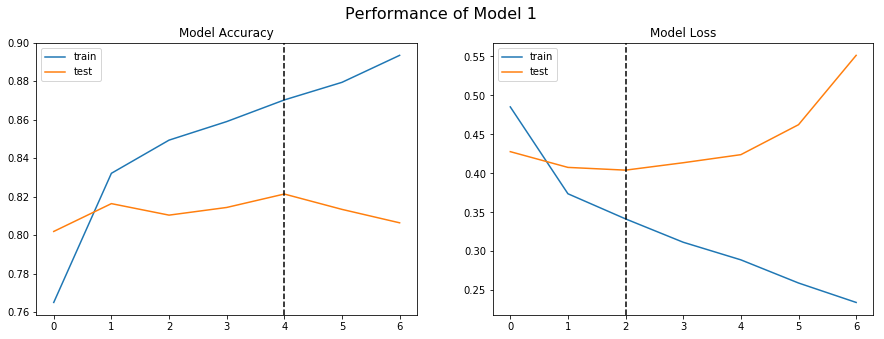

In [59]:
#crating accuracy and loss plot function 

def acc_loss_plot(model, model_name='Insert_Model_Name'):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
    fig.suptitle(model_name, fontsize=16)
    ax1.plot(model.history['acc'])
    ax1.plot(model.history['val_acc'])
    vline_cut = np.where(model.history['val_acc'] == np.max(model.history['val_acc']))[0][0]
    ax1.axvline(x=vline_cut, color='k', linestyle='--')
    ax1.set_title("Model Accuracy")
    ax1.legend(['train', 'test'])
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epochs')

    ax2.plot(model.history['loss'])
    ax2.plot(model.history['val_loss'])
    vline_cut = np.where(model.history['val_loss'] == np.min(model.history['val_loss']))[0][0]
    ax2.axvline(x=vline_cut, color='k', linestyle='--')
    ax2.set_title("Model Loss")
    ax2.legend(['train', 'test'])
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epochs')

    plt.show()

In [ ]:
acc_loss_plot(model_1_hist, 'Model 1')
acc_loss_plot(model_2_hist, 'Model 2')
acc_loss_plot(model_3_hist, 'Model 3')

## Further work
---
- We're curious to see how much accuracy increases by the following: 
    - larger GloVe model 
    - tweak the number of nodes 
    - tweak the number of hidden layers
    - different dropout patterns
    - any many more

In [62]:
print("--- %s seconds ---" % (time.time() - start_time))  

--- 1255.365525007248 seconds ---


# Panel API
___

In [ ]:
import panel as pn 
